<a href="https://colab.research.google.com/github/seungeunlee00/JUNIA/blob/main/MH/Simulated_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated Annealing Algorithm(SA)

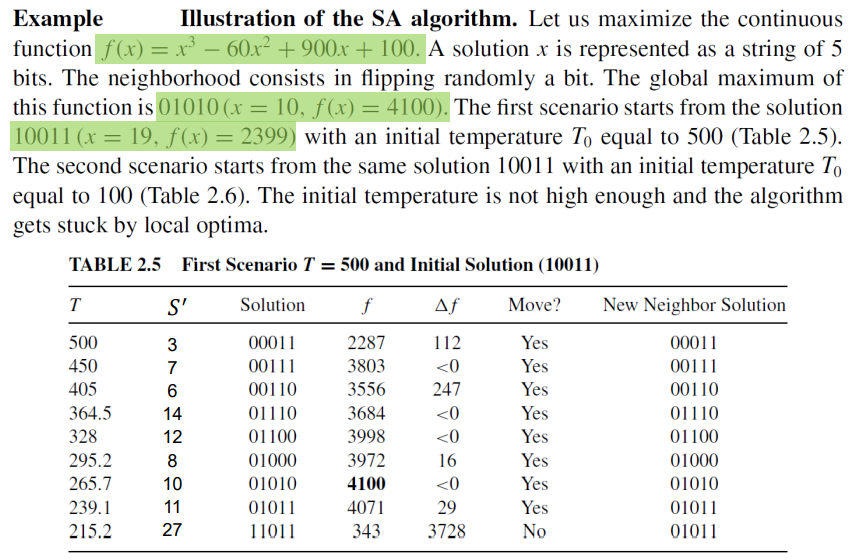

1. maximize the continuous function
f(x) = x*x*x - 60xx + 900x + 100

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import exp

def fn(x):
    return x**3 - 60*x**2 + 900*x + 100

def to_bin(x):
    b=[0,0,0,0,0]
    i=-1
    while x//2!=0:
        b[i]=x%2
        x=x//2
        i=i-1
    b[i]=1
    return b
def to_dec(b):
    x = 0
    i=-1
    for y in b:
        x = x+y*2**(5+i)
        i = i-1
    return x

def hamming(s):
    b = to_bin(s[0])
    ir = random.randint(0,4)
    a = b.copy()
    a[ir] = int(not a[ir])
    x = to_dec(a)
    return [x, fn(x)]

def cooling(t): 
    # geomatric (most popular)
    t1 = 0.7*t
    return t1

def probability(s, s_, temp):
    p = exp(-(abs(s[1]-s_[1])/temp))
    return p


Initial Solution:  [23, 1227]

Temp:  500
----select----
[31, 131]
probability:  0.11169313880444368
Move? No

Temp:  350.0
----select----
[19, 2399]

Temp:  244.99999999999997
----select----
[27, 343]
probability:  0.00022671048868972367
Move? No

Temp:  171.49999999999997
----select----
[3, 2287]
probability:  0.5204501210207021
Move? Yes

Temp:  120.04999999999997
----select----
[11, 4071]

Temp:  84.03499999999997
----select----
[3, 2287]
probability:  6.029120901071878e-10
Move? No

Temp:  58.82449999999997
----select----
[10, 4100]

Temp:  41.177149999999976
----select----
[2, 1668]
probability:  2.2374342741441892e-26
Move? No

Temp:  28.824004999999982
----select----
[14, 3684]
probability:  5.396122955922734e-07
Move? No

Temp:  20.176803499999988
----select----
[26, 516]
probability:  7.184422084804953e-78
Move? No

Temp:  14.12376244999999
----select----
[26, 516]
probability:  6.235129595253197e-111
Move? No

Temp:  9.886633714999993
----select----
[14, 3684]
probability:  

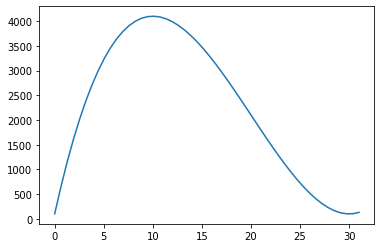

In [ ]:
x = random.randint(0,31)
s = [x,fn(x)]
temp=500
print('Initial Solution: ', s)
print('\nTemp: ', temp)
while temp>5:
  i=0
  while i<5:
    s_ = hamming(s)
    print('----select----')
    print(s_)
    if s_[1] > s[1]:
      s = s_.copy()
    else:
      p=probability(s, s_, temp)
      print('probability: ', p)
      r=random.uniform(0, 1)
      if r < p:
        s = s_.copy()
        print('Move? Yes')
      else:
        print('Move? No')
      i=i+1
    temp=cooling(temp)
    print('\nTemp: ', temp)
print('----final result----')
print(s)

x = np.linspace(0, 31)
plt.plot(x, fn(x))

2. TSP

In [ ]:
# Import libraries
import random
import copy
import numpy as np

# This class represent a state
class State:
    # Create a new state
    def __init__(self, route:[], distance:int=0):
        self.route = route
        self.distance = distance
    # Sort states
    def __lt__(self, other):
         return self.distance < other.distance
    # Create a shallow copy
    def copy(self):
        return State(self.route, self.distance)
    # Create a deep copy
    def deepcopy(self):
        return State(copy.deepcopy(self.route), copy.deepcopy(self.distance))
    # Update distance
    def update_distance(self, matrix, home):  
        # Reset distance
        self.distance = 0
        # Keep track of departing city
        from_index = home
        # Loop all cities in the current route
        for i in range(len(self.route)):
            self.distance += matrix[from_index][self.route[i]]
            from_index = self.route[i]
        # Add the distance back to home
        self.distance += matrix[from_index][home]

# This class represent a city (used when we need to delete cities)
class City:
    # Create a new city
    def __init__(self, index:int, distance:int):
        self.index = index
        self.distance = distance
    # Sort cities
    def __lt__(self, other):
         return self.distance < other.distance

# Return true with probability p
def probability(p):
    return p > random.uniform(0.0, 1.0)

# Schedule function for simulated annealing
def exp_schedule(k=20, lam=0.005, limit=1000):
    return lambda t: (k * np.exp(-lam * t) if t < limit else 0)

# Get best solution by distance
def get_best_solution_by_distance(matrix:[], home:int):
    # Variables
    route = []
    from_index = home
    length = len(matrix) - 1
    # Loop until route is complete
    while len(route) < length:
         # Get a matrix row
        row = matrix[from_index]
        # Create a list with cities
        cities = {}
        for i in range(len(row)):
            cities[i] = City(i, row[i])
        # Remove cities that already is assigned to the route
        del cities[home]
        for i in route:
            del cities[i]
        # Sort cities
        sorted = list(cities.values())
        sorted.sort()
        # Add the city with the shortest distance
        from_index = sorted[0].index
        route.append(from_index)
    # Create a new state and update the distance
    state = State(route)
    state.update_distance(matrix, home)
    # Return a state
    return state

# Mutate a solution
def mutate(matrix:[], home:int, state:State, mutation_rate:float=0.01):
    # Create a copy of the state
    mutated_state = state.deepcopy()
    # Loop all the states in a route
    for i in range(len(mutated_state.route)):
        # Check if we should do a mutation
        if(random.random() < mutation_rate):
            # Swap two cities
            j = int(random.random() * len(state.route))
            city_1 = mutated_state.route[i]
            city_2 = mutated_state.route[j]
            mutated_state.route[i] = city_2
            mutated_state.route[j] = city_1
    # Update the distance
    mutated_state.update_distance(matrix, home)
    # Return a mutated state
    return mutated_state

# Simulated annealing
def simulated_annealing(matrix:[], home:int, initial_state:State, mutation_rate:float=0.01, schedule=exp_schedule()):
    # Keep track of the best state
    best_state = initial_state
    # Loop a large number of times (int.max)
    for t in range(sys.maxsize):
        # Get a temperature
        T = schedule(t)
        # Return if temperature is 0
        if T == 0:
            return best_state
        # Mutate the best state
        neighbor = mutate(matrix, home, best_state, mutation_rate)
        # Calculate the change in e
        delta_e = best_state.distance - neighbor.distance
        # Check if we should update the best state
        if delta_e > 0 or probability(np.exp(delta_e / T)):
            best_state = neighbor

# The main entry point for this module
def main():
    # Cities to travel
    cities = ['New York', 'Los Angeles', 'Chicago', 'Minneapolis', 'Denver', 'Dallas', 'Seattle', 'Boston', 'San Francisco', 'St. Louis', 'Houston', 'Phoenix', 'Salt Lake City']
    city_indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    # Index of start location
    home = 0 # New York
    # Distances in miles between cities, same indexes (i, j) as in the cities array
    matrix = [[0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
            [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
            [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
            [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
            [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
            [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
            [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
            [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
            [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
            [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
            [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
            [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
            [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0]]
   
    # Run simulated annealing to find a better solution
    state = get_best_solution_by_distance(matrix, home)
    state = simulated_annealing(matrix, home, state, 0.1)
    print('-- Simulated annealing solution --')
    print(cities[home], end='')
    for i in range(0, len(state.route)):
       print(' -> ' + cities[state.route[i]], end='')
    print(' -> ' + cities[home], end='')
    print('\n\nTotal distance: {0} miles'.format(state.distance))
    print()

# Tell python to run main method
if __name__ == "__main__": main()

-- Simulated annealing solution --
New York -> Boston -> Chicago -> St. Louis -> Minneapolis -> Denver -> Salt Lake City -> Seattle -> San Francisco -> Los Angeles -> Phoenix -> Dallas -> Houston -> New York

Total distance: 7534 miles

